# Classification - Decision Tree

In [1]:
# Required imports for this task
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import graphviz
import pydotplus

#global variables to be used for font style
esc_start_green = '\033[32;1;4m'
esc_start_blue = '\033[34;1m'
esc_start_underline = '\033[34;1;4m'
esc_end = '\033[0m'

In [2]:
# Load wine dataset from sklearn datasets
from sklearn.datasets import load_wine
wine_data = load_wine()

In [3]:
# Create a dataframe and print the first and last five records of your dataset
features = pd.DataFrame(data=wine_data.data,columns=wine_data.feature_names)
wine_df = features

# Append target and class columns to the dataframe object manually
wine_df['target']=wine_data['target']
wine_df['class']=wine_df['target'].map(lambda var: wine_data['target_names'][var])

print(esc_start_underline,'First five records of dataset',esc_end,'\n\n',wine_df.head(),'\n')
print(esc_start_underline,'Last five records of dataset',esc_end,'\n\n',wine_df.tail())

 First five records of dataset  

    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_w

In [4]:
# Print the class names
print(esc_start_blue,"Target class names for Wine data set:\n",esc_end,np.unique(wine_df['class']))

 Target class names for Wine data set:
  ['class_0' 'class_1' 'class_2']


In [5]:
# Drop class and target in new object for futher analysis
wine_df_data = wine_df.drop(['class','target'],axis=1)
# Split your dataset 70% for training, and 30% for testing the classifier
x_train, x_test, y_train, y_test = train_test_split(wine_df_data,wine_df.target,test_size=0.3)

print(esc_start_blue,'Number of samples in training data:-',esc_end,len(x_train),
      esc_start_blue,'\n Number of samples in test data:-',esc_end, len(x_test))

 Number of samples in training data:-  124  
 Number of samples in test data:-  54


 Calculation of Decision Tree based on Gini 
 
 Values of Impurity based on Gini for all the nodes in the tree

  [0.65933923 0.         0.59079692 0.0973044  0.         0.
 0.26756198 0.         0.        ]
 
 Confusion matrix
  [[20  2  0]
 [ 0 20  1]
 [ 0  0 11]]
 
 Classification Report
               precision    recall  f1-score   support

          0       1.00      0.91      0.95        22
          1       0.91      0.95      0.93        21
          2       0.92      1.00      0.96        11

avg / total       0.95      0.94      0.94        54

 
 Accuracy Score:  94.44 %
 

Classification Tree Based on Gini Values

 


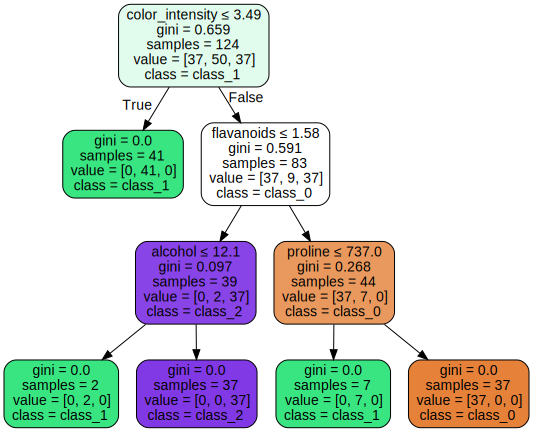

In [6]:
# Use gini as classifier for the tree
ctGini = tree.DecisionTreeClassifier(criterion='gini')
ctGini.fit(x_train, y_train)

# Predict the output
y_pred = ctGini.predict(x_test)

# Generate Confusion Matrix
cmGini = confusion_matrix(y_test, y_pred)

# Generate Classification Report
crGini = classification_report(y_test, y_pred)

# Calculate accuracy
accurayGini = accuracy_score(y_test, y_pred)

print(esc_start_green,"Calculation of Decision Tree based on Gini",esc_end)
print(esc_start_blue,"\n Values of Impurity based on Gini for all the nodes in the tree\n\n",esc_end,ctGini.tree_.impurity)
print(esc_start_blue,"\n Confusion matrix\n",esc_end,cmGini)
print(esc_start_blue,"\n Classification Report\n",esc_end,crGini)
print(esc_start_blue,"\n Accuracy Score:",esc_end,round((accurayGini*100),2),'%')
print(esc_start_blue,"\n\nClassification Tree Based on Gini Values\n\n",esc_end)

# Export the data into Graph
ctGini_data = tree.export_graphviz(ctGini, out_file=None, 
                         feature_names=wine_df_data.columns.values,  
                         class_names=wine_df['class'].unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(ctGini_data)

# Set the size of generated graph
pydot_graph.set_size('"8,6!"')

# Save generated graph in png format in local directory
pydot_graph.write_png('GiniDT.png')

#Display Disicion Tree
graphGini = graphviz.Source(pydot_graph.to_string())
graphGini

 Calculation of Decision Tree based on Entropy 
 
 Values of Impurity based on Entropy for all the nodes in the tree

  [1.56958052 0.97511906 0.         0.66901584 0.         0.
 0.71115372 0.91829583 0.         0.         0.        ]
 
 Confusion matrix
  [[20  2  0]
 [ 2 18  1]
 [ 0  1 10]]
 
 Classification Report
               precision    recall  f1-score   support

          0       0.91      0.91      0.91        22
          1       0.86      0.86      0.86        21
          2       0.91      0.91      0.91        11

avg / total       0.89      0.89      0.89        54

 
 Accuracy Score:  88.89 %
 

Classification Tree Based on Entropy Values

 


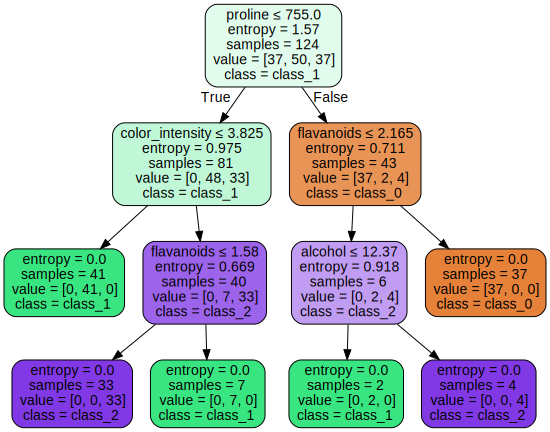

In [7]:
# Use entropy as classifier for the tree
ctEntropy = tree.DecisionTreeClassifier(criterion='entropy')
ctEntropy.fit(x_train, y_train)

# Predict the output
y_pred = ctEntropy.fit(x_train, y_train).predict(x_test)

# Generate Confusion Matrix
cmEntropy = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accurayEntropy = accuracy_score(y_test, y_pred)

print(esc_start_green,"Calculation of Decision Tree based on Entropy",esc_end)
print(esc_start_blue,"\n Values of Impurity based on Entropy for all the nodes in the tree\n\n",esc_end,ctEntropy.tree_.impurity)
print(esc_start_blue,"\n Confusion matrix\n",esc_end,cmEntropy)
print(esc_start_blue,"\n Classification Report\n",esc_end,classification_report(y_test, y_pred))
print(esc_start_blue,"\n Accuracy Score:",esc_end,round((accurayEntropy*100),2),'%')
print(esc_start_blue,"\n\nClassification Tree Based on Entropy Values\n\n",esc_end)

# Export the data into Graph
ctEntropy_data = tree.export_graphviz(ctEntropy, out_file=None, 
                         feature_names=wine_df_data.columns.values,  
                         class_names=wine_df['class'].unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(ctEntropy_data)

# Set the size of generated graph
pydot_graph.set_size('"8,6!"')

# Save generated graph in png format in local directory
pydot_graph.write_png('EntropyDT.png')

#Display Disicion Tree
graphEntropy = graphviz.Source(pydot_graph.to_string())
graphEntropy

## <strong>References:</strong>
<b>1. Dataset API related functionalities:</b>
    <p>http://scikit-learn.org/stable/datasets/index.html</p>
    <p>http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine</p>
    <p>https://jonathonbechtel.com/blog/2018/02/06/wines/</p>

<b>2. Font Styles:</b>
    <p>http://ascii-table.com/ansi-escape-sequences.php</p>

<b>3. Data Preprocessing:</b>
    <p>https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/</p>

<b>4. Tree Visualization:</b>
    <p>https://pythonprogramminglanguage.com/decision-tree-visual-example/</p>